In [1]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


In [2]:
data = pd.read_csv('model_df_status.csv', index_col=0)

In [28]:
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [3]:
data = data[data['issue_d']<'2015-01-01']

In [30]:
data.dtypes

id                              int64
loan_amnt                     float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                      int64
home_ownership                 object
annual_inc                    float64
issue_d                        object
purpose                        object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
fico_range_low                float64
fico_range_high               float64
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                    float64
total_acc                     float64
acc_now_delinq                float64
delinq_amnt 

In [4]:
drop_cols = ['earliest_cr_line', 'grade', 'id', 'fico_range_low','issue_d']
data= data.drop(drop_cols,axis=1)

In [5]:
le = LabelEncoder()
categorical_features = [feature for feature in data.columns if data[feature].dtypes == 'O']

for feature in categorical_features:
    data[feature]=le.fit_transform(data[feature])
data

,loan_amnt,term,int_rate,installment,sub_grade,emp_title,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,loan_status,credit_hist_years
1117051,21425.0,1,15.59,516.36,0,37410,6,4,63800.0,1,22,18.49,0.0,689.0,0.0,10.0,0.0,16374.0,76.2,35.0,0.0,0.0,0.0,0,1,11.3
1117055,12975.0,0,17.86,468.17,4,41338,10,4,60000.0,5,9,22.42,0.0,684.0,0.0,11.0,0.0,5200.0,33.1,19.0,0.0,0.0,0.0,0,0,15.9
1117060,2000.0,0,15.99,70.31,1,46279,7,4,37000.0,9,3,16.19,2.0,704.0,1.0,9.0,0.0,4533.0,20.1,22.0,0.0,0.0,0.0,0,1,21.0
1117064,4000.0,0,15.99,140.61,1,1389,9,4,50000.0,2,31,33.99,0.0,669.0,1.0,12.0,0.0,5697.0,65.5,23.0,0.0,0.0,0.0,0,1,12.8
1117080,8750.0,0,21.99,334.13,9,52550,8,0,81200.0,8,11,29.38,0.0,684.0,2.0,12.0,0.0,31362.0,75.9,37.0,0.0,0.0,0.0,0,1,13.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1939341,20000.0,1,19.91,361.62,8,15333,10,4,69996.0,2,4,13.84,0.0,719.0,1.0,5.0,0.0,19886.0,98.4,13.0,0.0,0.0,0.0,0,1,13.5
1939342,18000.0,1,17.58,452.98,3,6398,10,0,100000.0,2,40,17.57,0.0,689.0,1.0,13.0,0.0,19243.0,73.2,41.0,0.0,0.0,0.0,0,1,14.9
1939343,17500.0,1,22.74,471.10,15,30599,6,0,95000.0,2,44,24.78,0.0,664.0,1.0,12.0,0.0,23722.0,76.3,23.0,0.0,0.0,0.0,0,0,10.0
1939349,20500.0,0,16.77,728.54,1,50421,7,4,60000.0,2,31,16.40,1.0,704.0,3.0,10.0,0.0,15417.0,58.4,20.0,0.0,0.0,0.0,0,1,23.3


In [6]:
Xrf = data.drop('loan_status', axis=1)
yrf = data['loan_status']

Xrf_train,Xrf_test, yrf_train, yrf_test = train_test_split(Xrf,yrf)

In [12]:
Xrf_train.head()

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years
1149472,7200.0,0,17.57,258.75,3,10,0,85000.0,2,21,17.73,0.0,664.0,0.0,15.0,0.0,18203.0,79.9,36.0,0.0,0.0,0.0,0,18.3
1312148,25000.0,1,18.25,638.25,2,10,4,150000.0,1,5,13.27,1.0,694.0,0.0,7.0,0.0,37619.0,82.7,14.0,0.0,0.0,0.0,0,50.8
1212642,10800.0,1,15.61,260.41,0,3,0,70000.0,1,43,7.37,0.0,664.0,0.0,18.0,1.0,14460.0,80.3,32.0,0.0,0.0,0.0,0,12.0
1324817,31000.0,0,18.92,1135.09,3,1,0,120000.0,2,4,13.36,0.0,699.0,1.0,9.0,0.0,53331.0,49.1,23.0,0.0,0.0,0.0,0,27.1
1158228,11200.0,1,19.52,293.75,6,10,0,65000.0,2,41,10.51,0.0,689.0,1.0,9.0,0.0,4175.0,52.8,32.0,0.0,0.0,0.0,0,16.0


In [7]:
import xgboost as xgb

In [55]:
data['loan_status'].value_counts()

1    86426
0    34728
Name: loan_status, dtype: int64

In [10]:
xgb_model = xgb.XGBClassifier(n_estimators = 3000, learning_rate = .01)

In [11]:
xgb_model.fit(Xrf_train, yrf_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=3000, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [12]:
xgb_model.score(Xrf_train, yrf_train)

0.7456666483244373

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = yrf_train, y_pred = xgb_model.predict(Xrf_train))

array([[ 3647, 22403],
       [  707, 64108]])

In [76]:
xgb_model.predict(Xrf_test)

array([0, 1, 0, ..., 0, 0, 1])

In [14]:
confusion_matrix(y_true = yrf_test, y_pred = xgb_model.predict(Xrf_test))

array([[  596,  8082],
       [  560, 21051]])

In [15]:
xgb_class_test = Xrf_test.copy()

In [25]:
xgb_class_test['prob_paid_back'] = pd.DataFrame(xgb_model.predict_proba(xgb_class_test)).iloc[:,1]

In [30]:
xgb_class_test = xgb_class_test.drop('prob_paid_back', axis = 1)

In [35]:
xgb_class_test['prob_paid_back'] = list(pd.DataFrame(xgb_model.predict_proba(xgb_class_test)).iloc[:,1])

In [1]:
xgb_class_test

NameError: name 'xgb_class_test' is not defined

In [ ]:
xgb_class_test = pd.concat([xgb_class_test,yrf_test], axis = 1)

In [ ]:
xgb_class_test.to_csv('xgb_class_test.csv')

In [100]:
weights = [.1,.2,.3,.4,.5,.6,.7,.8,.9]
param_grid = dict(scale_pos_weight=weights)
cv = RepeatedStratifiedKFold(n_splits=5)
grid = GridSearchCV(estimator=xgb_model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='roc_auc')

In [ ]:
grid.fit(Xrf_train, yrf_train)

In [50]:
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBClassifier

In [51]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

In [52]:
scores = cross_val_score(xgb_model, Xrf_train, yrf_train, scoring='roc_auc', cv=cv, n_jobs=-1)

In [53]:
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.62558


In [14]:
prediction_df = Xrf_train
prediction_df['prediction'] = grid_gbr.predict(prediction_df)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [125]:
Xrf_train.shape

(252711, 25)

In [15]:
prediction_df = pd.concat([prediction_df,yrf_train],axis =1)

In [16]:
prediction_df.sort_values(by = 'prediction')

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,home_ownership,annual_inc,purpose,addr_state,dti,delinq_2yrs,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,collections_12_mths_ex_med,application_type,credit_hist_years,prediction,roi_percent
1652520,25000.0,0,13.55,155.37,3,1,0,64000.0,6,6,13.50,0.0,699.0,2.0,13.0,0.0,8399.0,41.0,31.0,0.0,0.0,0.0,0,20.8,-0.401230,-0.912993
1645439,24000.0,0,14.96,831.52,1,7,3,350000.0,11,19,11.38,0.0,719.0,7.0,13.0,0.0,1207359.0,56.0,33.0,0.0,0.0,0.0,0,23.4,-0.395995,-0.887715
1652646,25000.0,0,12.92,175.01,1,5,4,83000.0,2,35,14.24,0.0,709.0,0.0,11.0,0.0,56002.0,73.8,26.0,0.0,0.0,0.0,0,23.8,-0.370874,-0.777420
1169179,35000.0,1,25.89,1045.64,17,10,4,102500.0,2,39,36.55,12.0,669.0,2.0,8.0,0.0,3703.0,26.6,43.0,0.0,0.0,2.0,0,11.9,-0.359086,0.108841
1653928,8000.0,0,14.70,276.15,9,6,0,50800.0,4,10,19.13,0.0,649.0,15.0,6.0,0.0,289.0,28.9,7.0,0.0,0.0,0.0,0,0.7,-0.308224,-0.827406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1775424,2000.0,1,23.70,57.19,10,10,3,109000.0,9,32,9.47,0.0,664.0,0.0,8.0,0.0,23971.0,94.7,27.0,0.0,0.0,0.0,0,22.5,0.386819,-0.034840
1331932,2800.0,0,25.83,112.57,16,10,0,48000.0,9,21,33.22,4.0,669.0,0.0,11.0,0.0,26070.0,90.8,30.0,0.0,0.0,0.0,0,32.5,0.412085,0.399496
1824318,15000.0,1,25.89,448.14,17,10,0,500000.0,9,32,10.03,1.0,709.0,4.0,10.0,1.0,9743.0,93.8,30.0,0.0,0.0,0.0,0,27.4,0.437842,0.528744
1832773,30000.0,1,24.89,878.61,19,10,0,125000.0,2,41,16.14,0.0,674.0,4.0,8.0,0.0,37308.0,99.8,29.0,0.0,0.0,0.0,0,28.3,0.448156,0.551865


In [50]:
pd.set_option('display.min_rows', 15000)

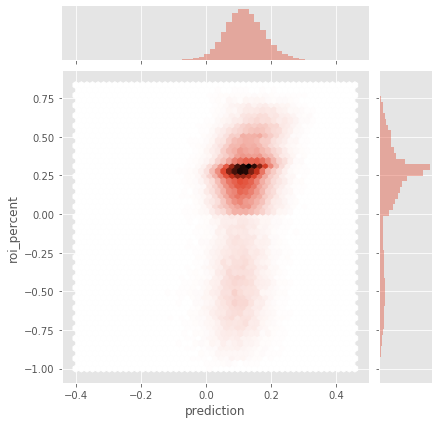

In [17]:
sns.jointplot(x='prediction', y= 'roi_percent', data = prediction_df, kind = 'hex')

In [56]:
grid_gbr.best_estimator_.feature_importances_

array([3.26929777e-02, 6.41917829e-02, 3.95315715e-02, 3.75533643e-02,
       7.95930367e-03, 1.27414323e-02, 4.30418306e-02, 3.37881310e-02,
       5.17955965e-01, 1.10774235e-02, 1.94606281e-02, 3.53384675e-02,
       3.45017714e-03, 1.22830766e-02, 1.70767902e-02, 9.80389767e-03,
       2.96767618e-03, 3.49518006e-02, 2.10258710e-02, 1.31425184e-02,
       4.28182632e-04, 1.79153993e-03, 1.13531743e-03, 1.10793386e-03,
       2.55023398e-02])

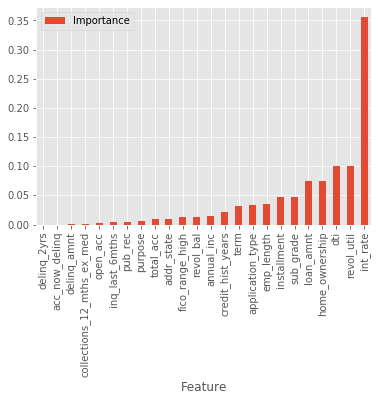

In [146]:
feature_importance=pd.DataFrame(zip(list(grid_gbr2.best_estimator_.feature_importances_),Xrf_train.columns))
feature_importance.columns = ['Importance','Feature']
feature_importance.sort_values('Importance').plot.bar(x='Feature',y='Importance')

In [97]:
x = grid_gbr.best_estimator_.staged_predict(Xrf_train.iloc[1,:])

In [106]:
print("Best: %f using %s" % (grid_gbr.best_score_, grid_gbr.best_params_))

Best: 0.112682 using {'max_depth': 3, 'n_estimators': 1000}


In [105]:
grid_gbr.best_estimator_.

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features='auto', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=0.8, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)